In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path 
# Append the src directory to sys.path
sys.path.append(str(Path.cwd().parent / "src"))

from config import *

In [19]:
# Charger les donnees traitees
data = pd.read_csv(PROCESSED_DATA_FILE)


# Analyse descriptive des scores ESG
summary_stats = data[['Total ESG Risk Score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].describe()
print(summary_stats)



       Total ESG Risk Score  Environment Risk Score  Governance Risk Score  \
count            430.000000              503.000000             503.000000   
mean              21.533721                5.494533               6.634394   
std                6.889176                4.745167               2.053097   
min                7.100000                0.000000               3.000000   
25%               16.400000                2.000000               5.400000   
50%               21.050000                4.050000               6.100000   
75%               26.000000                8.000000               7.400000   
max               41.700000               25.000000              19.400000   

       Social Risk Score  
count         503.000000  
mean            9.045726  
std             3.382050  
min             0.800000  
25%             7.200000  
50%             8.900000  
75%            10.800000  
max            22.500000  


C:\Users\HP\AppData\Local\Temp\ipykernel_42040\625499106.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


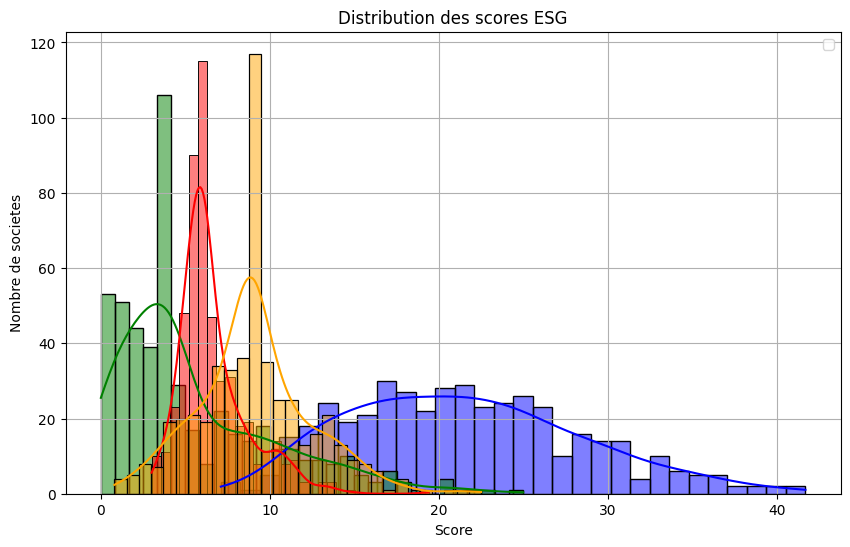

In [8]:
# Visualisation de la distribution des scores ESG
plt.figure(figsize=(10, 6))
sns.histplot(data['Total ESG Risk Score'], kde=True, color='blue', bins=30)
sns.histplot(data['Environment Risk Score'], kde=True, color='green', bins=30)
sns.histplot(data['Governance Risk Score'], kde=True, color='red', bins=30)
sns.histplot(data['Social Risk Score'], kde=True, color='orange', bins=30)
plt.legend()
plt.title('Distribution des scores ESG')
plt.xlabel('Score')
plt.ylabel('Nombre de societes')
plt.grid()
plt.show()


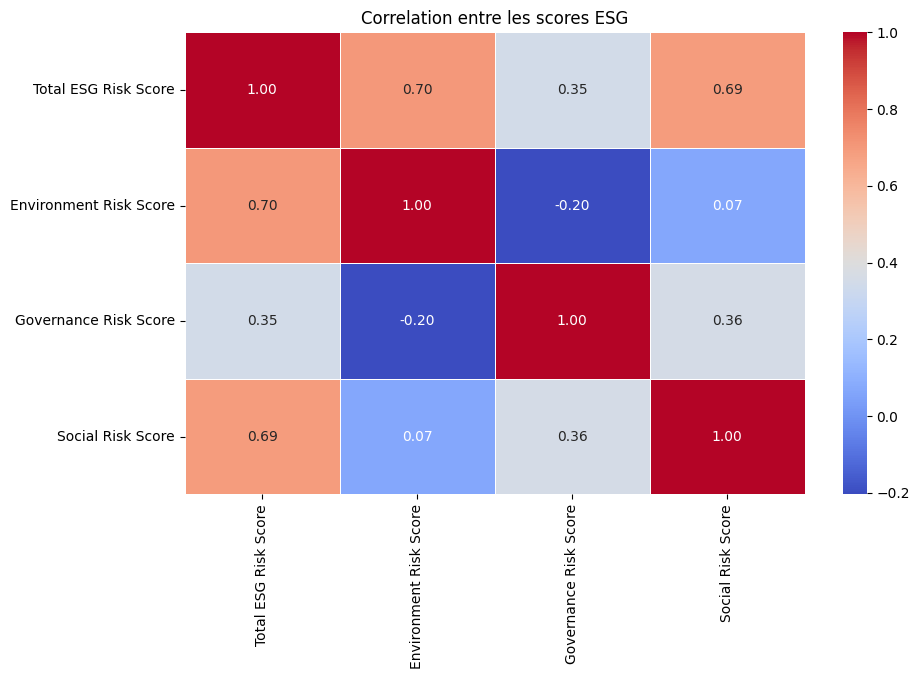

In [9]:
# Heatmap des correlations entre les scores ESG
corr = data[['Total ESG Risk Score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation entre les scores ESG')
plt.show()

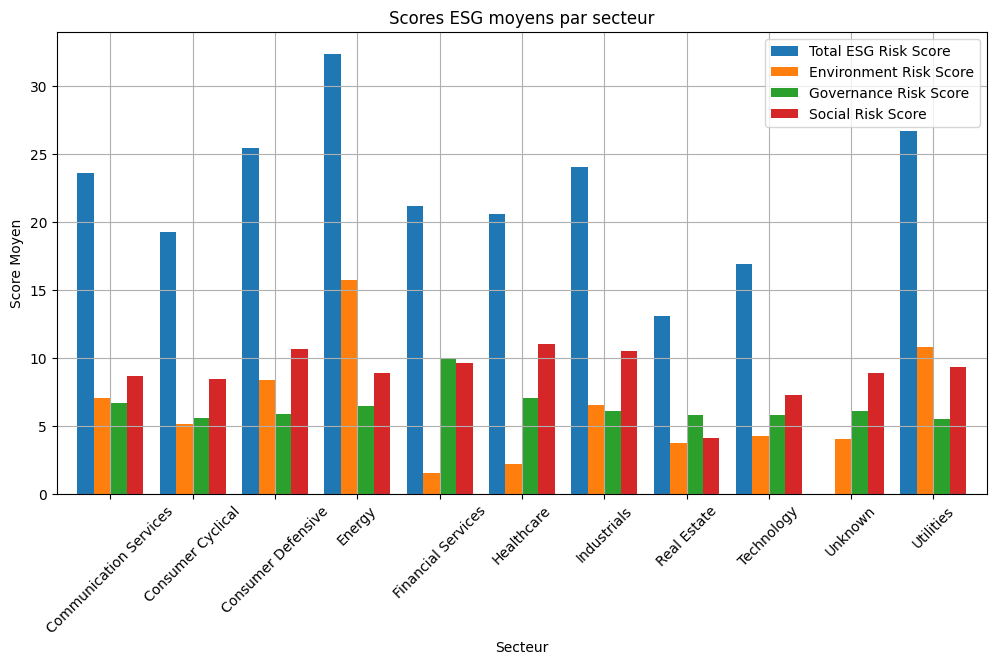

In [10]:
# Analyse des scores ESG moyens par secteur
sector_scores = data.groupby("Sector")[['Total ESG Risk Score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean()
sector_scores.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Scores ESG moyens par secteur')
plt.ylabel('Score Moyen')
plt.xlabel('Secteur')
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_42040\204431991.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=controversy_levels.index, y=controversy_levels.values, palette='viridis')


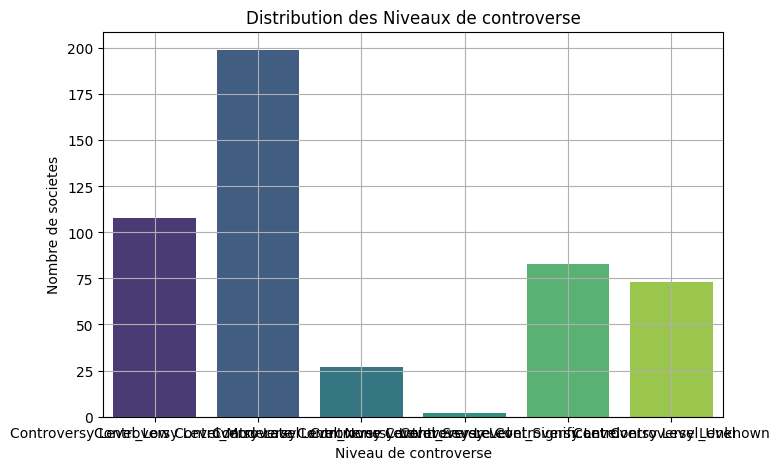

In [15]:
controversy_levels = data[
    [
        "Controversy Level_Low Controversy Level",
        "Controversy Level_Moderate Controversy Level",
        "Controversy Level_None Controversy Level",
        "Controversy Level_Severe Controversy Level",
        "Controversy Level_Significant Controversy Level",
        "Controversy Level_Unknown"
    ]
].sum()
# Visualisation des niveaux de controverse

plt.figure(figsize=(8,5))
sns.barplot(x=controversy_levels.index, y=controversy_levels.values, palette='viridis')
plt.title('Distribution des Niveaux de controverse')
plt.xlabel('Niveau de controverse')
plt.ylabel('Nombre de societes')
plt.grid()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_42040\1147677351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Total ESG Risk Score', data=data, palette='viridis')


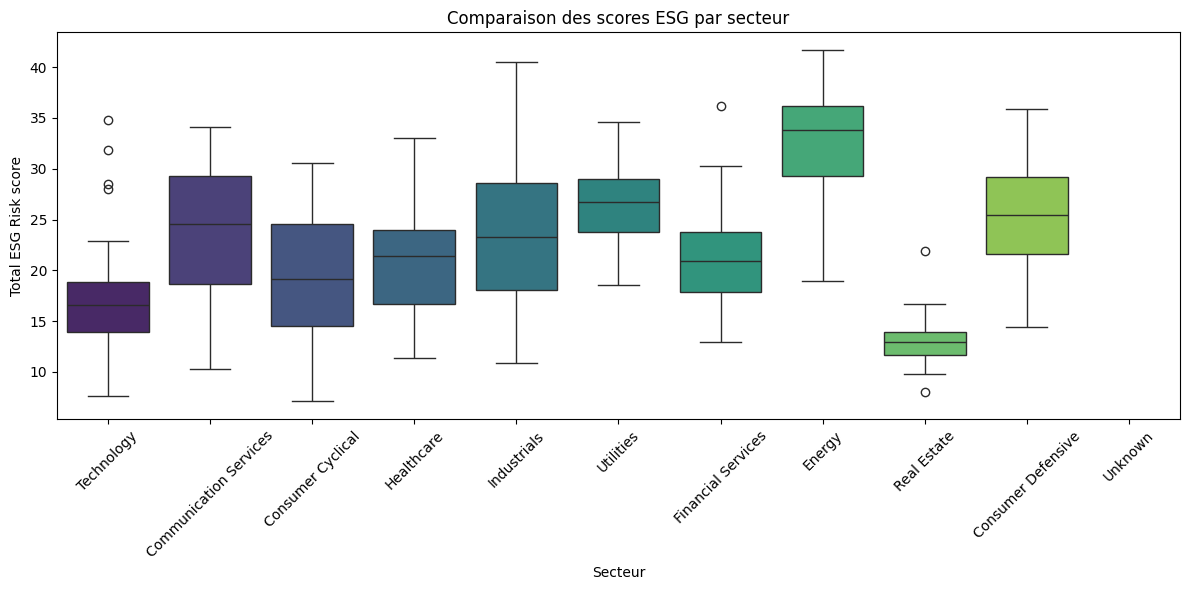

In [13]:
# Comparaison des scores ESG par secteur avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Total ESG Risk Score', data=data, palette='viridis')
plt.title('Comparaison des scores ESG par secteur')
plt.xlabel('Secteur')
plt.ylabel('Total ESG Risk score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Comptabiliser les scores ESG par entreprise
esg_performance = data[['Symbol', 'Name', 'Total ESG Risk Score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
esg_performance = esg_performance.sort_values(by='Total ESG Risk Score', ascending=False)

# Afficher les 10 meilleures entreprises
print(esg_performance.head(10))

    Symbol                              Name  Total ESG Risk Score  \
166    OXY  Occidental Petroleum Corporation                  41.7   
324    XOM           Exxon Mobil Corporation                  41.6   
297     GE          General Electric Company                  40.5   
434     BA                    Boeing Company                  39.6   
465    APA                   Apa Corporation                  38.8   
56     TDG      Transdigm Group Incorporated                  38.7   
219    MRO          Marathon Oil Corporation                  37.7   
502    MMM                        3m Company                  37.3   
129    PWR             Quanta Services, Inc.                  36.9   
400    CVX               Chevron Corporation                  36.6   

     Environment Risk Score  Governance Risk Score  Social Risk Score  
166                    25.0                    7.0                9.7  
324                    23.1                    8.5               10.0  
297          